Imagine a Bouncer at a club. He has a simple rule:

Under 18? You are Rejected (0).

Over 18? You are Accepted (1).

**We will make fake data: 40 people. Young people don't buy insurance; older people do.**

# **1: Setup & Data Creation**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
#1 . Create Fake Data
# ages between 18 to 60

ages = np.random.randint(18,60,40)

In [14]:
# The Rule: If Age > 35, they usually buy (1), else they don't (0).
# We add some randomness so it's not perfect (some young people buy, some old don't)

purchased = []  
for age in ages:
    if age > 35:
        #90% chance to buy if old
        purchased.append(1 if np.random.random() >0.1 else 0)
    else:
        #10% chance to buy if young
        purchased.append(1 if np.random.random() >0.9 else 0)
        

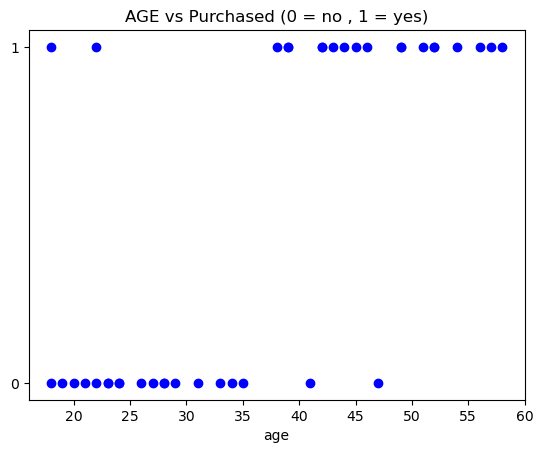

In [15]:
X = np.array(ages).reshape (-1,1) # Reshape to 2D array matrix
y = np.array(purchased)

#visualise it

plt.scatter(X,y, color = 'blue')
plt.title('AGE vs Purchased (0 = no , 1 = yes)')
plt.xlabel('age')
plt.yticks([0,1]),['No(0)' , 'Yes (1)']
plt.show()

In [16]:
print(ages)

[22 52 57 49 24 49 39 26 38 33 23 35 28 23 42 18 27 28 51 21 44 19 52 18
 58 42 29 54 31 45 46 24 43 41 22 39 34 47 20 56]


In [20]:
print(X)
print(y)

[[22]
 [52]
 [57]
 [49]
 [24]
 [49]
 [39]
 [26]
 [38]
 [33]
 [23]
 [35]
 [28]
 [23]
 [42]
 [18]
 [27]
 [28]
 [51]
 [21]
 [44]
 [19]
 [52]
 [18]
 [58]
 [42]
 [29]
 [54]
 [31]
 [45]
 [46]
 [24]
 [43]
 [41]
 [22]
 [39]
 [34]
 [47]
 [20]
 [56]]
[0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0
 0 0 1]


# **2: The Split**

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

# **3: Train the Classifier**

In [22]:
# Initialize the "Logistic" (Category) model
model = LogisticRegression()

# Train it
model.fit(X_train, y_train)

LogisticRegression()

# **4: The Prediction**

Let's ask about specific people.

Person A: 20 years old.

Person B: 50 years old.

In [23]:
new_people = [[20],[50]]
prediction = model.predict(new_people)

print(f"Prediction for 20 year old: {prediction[0]} (Expected : 0)")
print(f"Prediction for 50 year old: {prediction[1]} (Expected : 1)")

Prediction for 20 year old: 0 (Expected : 0)
Prediction for 50 year old: 1 (Expected : 1)


# **5: Visualize the S-Curve (The "Sigmoid")**

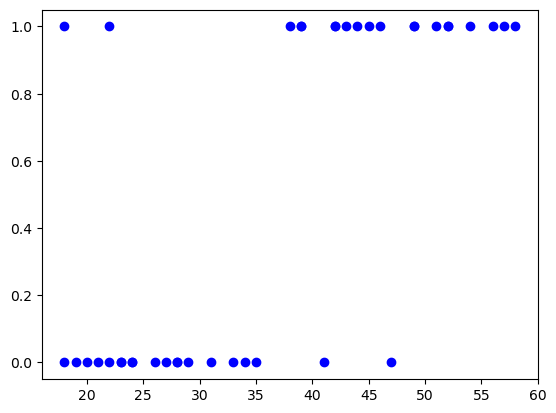

In [25]:
# 1. Plot the data points again
plt.scatter(X,y,color='blue')

# 2. Draw the S-Curve
# We create a smooth range of ages from 18 to 60 to draw the line

X_smooth = np.linspace(18,60,100).reshape(-1,1)
y_smooth = model.predict_proba(X_smooth)[:,1]# Get probabilities (0.0 to 1.0)

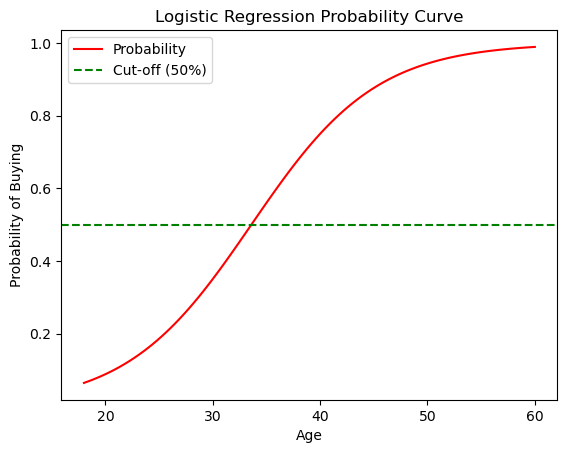

In [26]:
plt.plot(X_smooth, y_smooth, color='red', label='Probability')
plt.axhline(0.5, color='green', linestyle='--', label='Cut-off (50%)') # The Decision Line

plt.title("Logistic Regression Probability Curve")
plt.xlabel("Age")
plt.ylabel("Probability of Buying")
plt.legend()
plt.show()